## 교통사고 통계 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
df_accident = pd.read_excel('../datasets/accident_stat.xlsx')
df_accident

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,12767,445,5999,6664,458
1,차대사람,차도통행중,차도통행중,3628,146,1438,2007,183
2,차대사람,길가장자리구역통행중,길가장자리구역통행중,1973,33,563,1330,121
3,차대사람,보도통행중,보도통행중,2226,21,745,1455,131
4,차대사람,기타,기타,14675,333,4887,9139,1062
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


### 시각화 
- 사고유형대분류가 "차대차"인 사고유형별 사망비율을 막대그래프를 이용하여 시각화 

In [5]:
df_accident_car = df_accident.loc[df_accident['사고유형대분류'] == '차대차']
df_accident_car

,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162
8,차대차,추돌,추돌,32717,379,7564,47111,2748
9,차대차,기타,기타,44222,248,9990,49616,3839


In [7]:
df_accident_car['사망비율'] = df_accident_car['사망자수'] / df_accident_car['사고건수']  #사망비율 추가
df_accident_car

C:\Users\02-19\AppData\Local\Temp\ipykernel_10596\3789869694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident_car['사망비율'] = df_accident_car['사망자수'] / df_accident_car['사고건수']  #사망비율 추가


,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,사망비율
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.025976
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.005636
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.000569
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.011584
9,차대차,기타,기타,44222,248,9990,49616,3839,0.005608


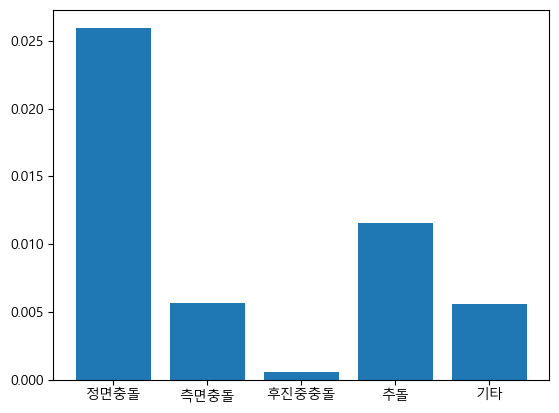

In [8]:
plt.bar(range(len(df_accident_car)), df_accident_car['사망비율'])
plt.xticks(range(len(df_accident_car)), df_accident_car['사고유형'])
plt.show()

### 사망자수가 가장 많은 사고 유형 출력 

In [10]:
df_accident.groupby('사고유형대분류')['사망자수'].idxmax()

사고유형대분류
차대사람     0
차대차      6
차량단독    12
Name: 사망자수, dtype: int64

### 중상비율 확인 후 저장 

In [12]:
df_accident_car['중상비율'] = df_accident_car['중상자수'] / df_accident_car['사고건수']
df_accident_car

C:\Users\02-19\AppData\Local\Temp\ipykernel_10596\772372066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accident_car['중상비율'] = df_accident_car['중상자수'] / df_accident_car['사고건수']


,사고유형대분류,사고유형중분류,사고유형,사고건수,사망자수,중상자수,경상자수,부상신고자수,사망비율,중상비율
5,차대차,정면충돌,정면충돌,7892,205,3539,8837,588,0.025976,0.448429
6,차대차,측면충돌,측면충돌,71687,404,17756,84667,5781,0.005636,0.247688
7,차대차,후진중충돌,후진중충돌,3514,2,304,4172,162,0.000569,0.086511
8,차대차,추돌,추돌,32717,379,7564,47111,2748,0.011584,0.231195
9,차대차,기타,기타,44222,248,9990,49616,3839,0.005608,0.225906


In [14]:
df_accident_car.loc[df_accident_car['중상비율'] > 0.5].to_csv("../datasets/중상비율.csv", index = False)